# **Masked Emotion Recognition Task**

Various Imports


In [ ]:
import tensorflow as tf
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import math
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
import seaborn as sn

Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/MyDrive/dataset/train_masked/'
test_path = '/content/drive/MyDrive/dataset/test_masked/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




Now, I count the number of examples for each class (emotion)

In [ ]:
def count_expression(path, set_):
    dictionary = {}
    for expression in os.listdir(path):
        directory = path + expression
        dictionary[expression] = len(os.listdir(directory))
    df = pd.DataFrame(dictionary, index=[set_])
    return df
train_counter = count_expression(train_path, 'train')
test_counter = count_expression(test_path, 'test')
print(train_counter)
print(test_counter)


       surprise   sad  neutral  fear  happy  disgust  angry
train      2358  2664     3731  2537   5605      341   2757
      sad  angry  neutral  disgust  fear  surprise  happy
test  665    642      931       86   646       611   1381


Print some examples of images in the Dataset

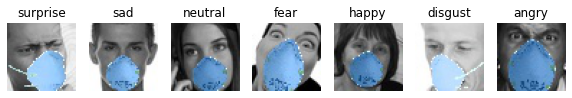

In [ ]:
plt.figure(figsize=(10,10))
d = 1
for i in os.listdir(train_path):
    img = load_img((train_path + i +'/'+ os.listdir(train_path + i)[1]))
    plt.subplot(1,7,d)
    plt.imshow(img)
    plt.title(i)
    plt.axis('off')
    d += 1
plt.show()

PREPROCESSING


I start from using ImageDataGenerator and data augmentation.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)

train_set = train_datagen.flow_from_directory(train_path, batch_size=64, target_size=(48,48), color_mode='grayscale',class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_path, batch_size=64, target_size=(48,48), color_mode='grayscale', class_mode='categorical')

Found 19993 images belonging to 7 classes.
Found 4962 images belonging to 7 classes.


Now, i define some parameters that we will need after


In [ ]:
num_classes = 7 
img_shape = 48
num_epochs = 50 
batch_size = 128 

I define the CNN model

In [ ]:
from keras import regularizers
model = Sequential()


#First Convolutional module
model.add(Conv2D(128, kernel_size=(3, 3), activation = 'relu', input_shape=(img_shape, img_shape, 1))) 
model.add(BatchNormalization())


#Second Convolutional module
model.add(Conv2D(128, kernel_size=(3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


#Third Convolutional module
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


#Fourth Convolutional module
model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))


#Flatten module
model.add(Flatten())


#First Dense module
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#Second Dense module
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#Third Dense module
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#Output layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 46, 46, 128)       1280      
_________________________________________________________________
batch_normalization_21 (Batc (None, 46, 46, 128)       512       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 44, 44, 128)       147584    
_________________________________________________________________
batch_normalization_22 (Batc (None, 44, 44, 128)       512       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)       

In [ ]:
history = model.fit(x = train_set, epochs = num_epochs,  validation_data = test_set)

Epoch 1/50
313/313 [==============================] - 6530s 21s/step - loss: 2.3605 - accuracy: 0.1933 - val_loss: 1.8313 - val_accuracy: 0.2783
Epoch 2/50
313/313 [==============================] - 49s 156ms/step - loss: 1.9024 - accuracy: 0.2354 - val_loss: 1.7769 - val_accuracy: 0.2827
Epoch 3/50
313/313 [==============================] - 49s 157ms/step - loss: 1.8033 - accuracy: 0.2690 - val_loss: 1.7473 - val_accuracy: 0.2880
Epoch 4/50
313/313 [==============================] - 48s 152ms/step - loss: 1.7345 - accuracy: 0.3040 - val_loss: 1.7282 - val_accuracy: 0.3033
Epoch 5/50
313/313 [==============================] - 50s 161ms/step - loss: 1.6925 - accuracy: 0.3240 - val_loss: 1.6939 - val_accuracy: 0.3152
Epoch 6/50
313/313 [==============================] - 49s 158ms/step - loss: 1.6597 - accuracy: 0.3396 - val_loss: 1.8177 - val_accuracy: 0.2805
Epoch 7/50
313/313 [==============================] - 50s 158ms/step - loss: 1.6336 - accuracy: 0.3505 - val_loss: 1.6742 - val_ac

Accuracy and loss Graphs

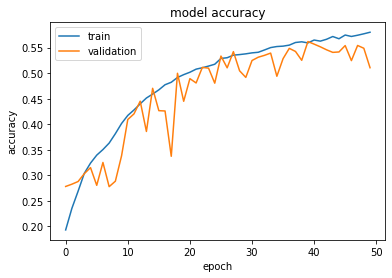

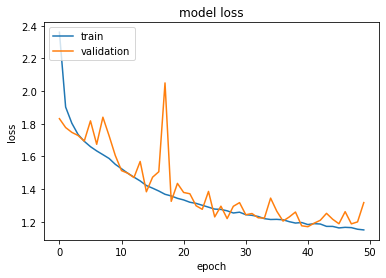

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_set)
print('Test accuracy:', test_acc)

78/78 [==============================] - 9s 114ms/step - loss: 1.3172 - accuracy: 0.5107
Test accuracy: 0.51068115234375


Confusion Matrix without normalization

In [ ]:
labels_confusion_matrix = {'Angry' : 0, 'Disgust' : 1, 'Fear' : 2, 'Happy' : 3, 'Sad' : 4, 'Surprise' : 5, 'Neutral' : '6'}

In [ ]:
def print_confusion_matrix_pandas(model, images, labels):
    num_classes = 7
    # Get the predicted classifications for the test-set.
    predictions = model.predict(images)
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(test_set.classes, np.argmax(predictions, axis = 1))
    # Plot the confusion matrix as an image.
    class_names = list({v:k for k,v in labels.items()}.values())
    df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
    plt.figure(figsize = (15,10))
    sn.heatmap(df_cm, annot=True, cmap='Blues')
    plt.axis([-0.5, 7.5, 7.5, -0.5])
    plt.title('Confusion Matrix Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

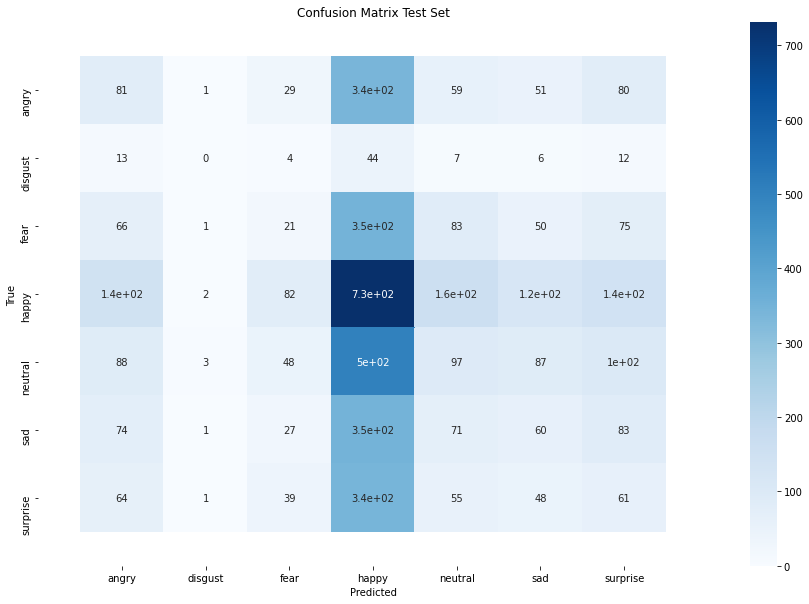

In [ ]:
print_confusion_matrix_pandas(model, test_set, test_set.class_indices)

Confusion Matrix with normalization

In [ ]:
def print_confusion_matrix_pandas(model, images, labels):
    num_classes = 7
    # Get the predicted classifications for the test-set.
    predictions = model.predict(images)
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(test_set.classes, np.argmax(predictions, axis = 1))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    # Plot the confusion matrix as an image.
    class_names = list({v:k for k,v in labels.items()}.values())
    df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
    plt.figure(figsize = (15,10))
    sn.heatmap(df_cm, annot=True, cmap='Blues')
    plt.axis([-0.5, 7.5, 7.5, -0.5])
    plt.title('Confusion Matrix Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

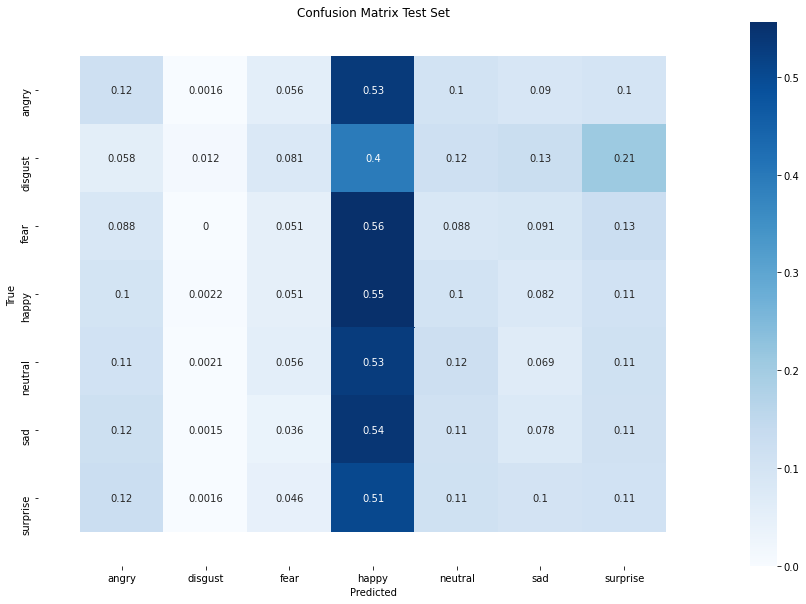

In [ ]:
print_confusion_matrix_pandas(model, test_set, test_set.class_indices)